## Superdense coding

In [2]:
# importing libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram 

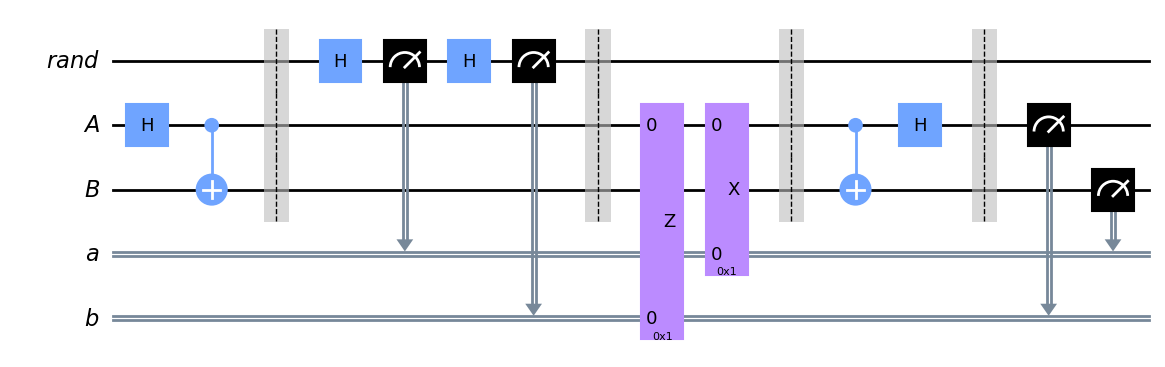

In [3]:
"Creating a class of Superdence Coding's Circuit"

class Super_dense_coding:
    
    'Initializing Cibits and Qbits as objects'
    def __init__(self,rand, a, b, ebit0, ebit1):
        self.rand = rand
        self.a = a
        self.b = b
        self.ebit0 = ebit0
        self.ebit1 = ebit1
        
        self.QC = QuantumCircuit(self.rand, self.a, self.b, self.ebit0, self.ebit1)   # Initializing Quantum Circuit
        
    'Quantum Circuit Attribute'
    def Quantum_Circuit(self):
        
        "Creating Entangled State of A and B Qbits"
        self.QC.h(self.ebit0)
        self.QC.cx(self.ebit0, self.ebit1)
        self.QC.barrier()      #It creates a visual Separation, 
                               #and prevents the Qiskit to perform various operations during compilation on real hardware
        
        "Creating Alice's Cbits States of ab"
        self.QC.h(self.rand)
        self.QC.measure(self.rand, self.a)
        self.QC.h(self.rand)
        self.QC.measure(self.rand, self.b)
        self.QC.barrier()
        
        
        " Alice's Actions"
        
        'Applying Z and X on first Qbit of Entangled Qbits by putting them to the condition of Cbits a and b'
        with self.QC.if_test((self.b, 1), label = 'Z'):
            self.QC.z(self.ebit0)
        
        with self.QC.if_test((self.a, 1), label = 'X'):
            self.QC.x(self.ebit0)
        self.QC.barrier()
        
        "Bob's Actions"
        
        self.QC.cx(self.ebit0, self.ebit1)     #Applying CNOT gate on B using A as a control Qbit
        self.QC.h(self.ebit0) 
        self.QC.barrier()
        
        "Measuring Qbits to Cbits"
        self.QC.measure(self.ebit0, self.b)
        self.QC.measure(self.ebit1, self.a)
        
        return self.QC
    
"CBits"
a = ClassicalRegister(1, 'a')
b = ClassicalRegister(1, 'b')

'A random Qbit'
rand = QuantumRegister(1, 'rand')

"QBits"
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')

SDC = Super_dense_coding(rand, a, b, ebit0, ebit1)     #Calling the class Super_dense_coding
SDC.Quantum_Circuit().draw(output='mpl')        # Drawing Quantum Circuit

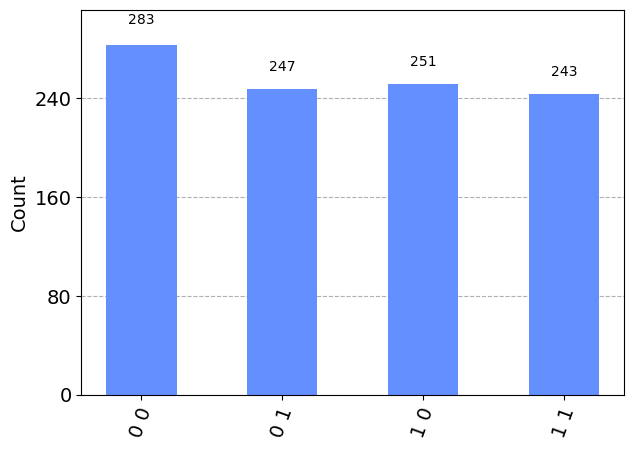

In [4]:
class Histogram(Super_dense_coding):
    
    def __init__(self):
        super().__init__(rand, a, b, ebit0, ebit1)
        self.simulator = AerSimulator()
        self.Qc = super().Quantum_Circuit()
        self.result = self.simulator.run(self.Qc).result()
        self.counts = self.result.get_counts()
        
    def Counts(self):
        return self.counts
    
hist = Histogram()
plot_histogram(hist.Counts())